### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# Check for missing values and problematic entries
missing_summary = data.isnull().sum().sort_values(ascending=False)

# Calculate percentage of missing values
missing_percent = (missing_summary / len(data)) * 100

# Combine results into a single DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percent Missing': missing_percent.round(2)
})

# Display the result
missing_data

,Missing Values,Percent Missing
car,12576,99.15
CoffeeHouse,217,1.71
Restaurant20To50,189,1.49
CarryAway,151,1.19
RestaurantLessThan20,130,1.02
Bar,107,0.84
weather,0,0.00
temperature,0,0.00
destination,0,0.00
passanger,0,0.00


3. Decide what to do about your missing data -- drop, replace, other...

In [67]:
# Drop the 'car' column (too many missing values)
data = data.drop(columns=['car'])

# List of columns with small proportions of missing data
cols_to_NaN = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']

# Replace missing values in these columns with 'NaN'
data[cols_to_NaN] = data[cols_to_NaN].fillna('NaN')

# Verify that no missing data remains
data.isnull().sum().sum()

np.int64(0)

4. What proportion of the total observations chose to accept the coupon?



In [72]:
# Calculate the proportion of customers who accepted the coupon (Y = 1)
acceptance_rate = data['Y'].mean()

# Display the result
print(f"Overall Coupon Acceptance Rate: {acceptance_rate:.2%}")

Overall Coupon Acceptance Rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

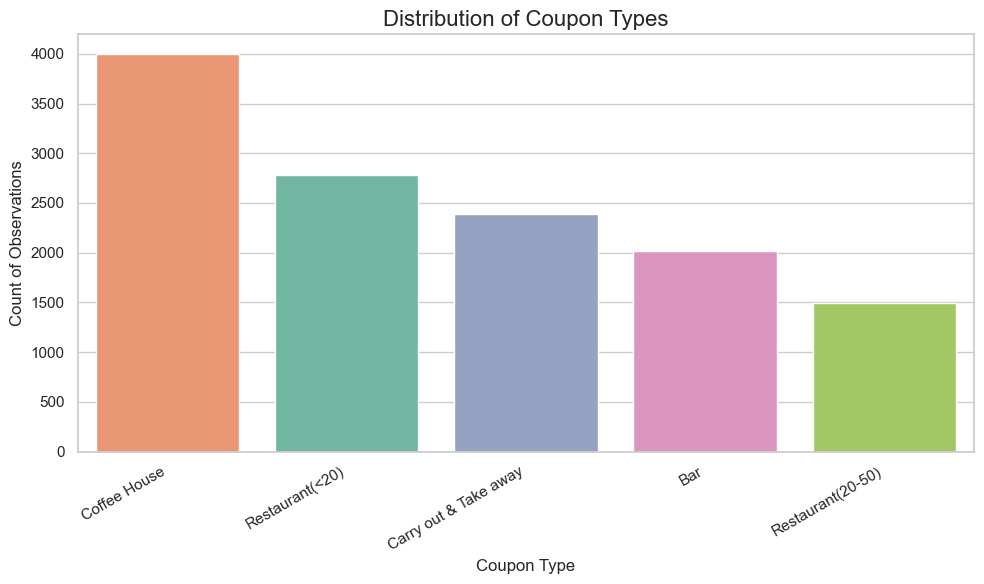

In [73]:
# Set style for better visuals
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, palette='Set2', hue='coupon', legend=False)

# Add title and labels
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count of Observations', fontsize=12)
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

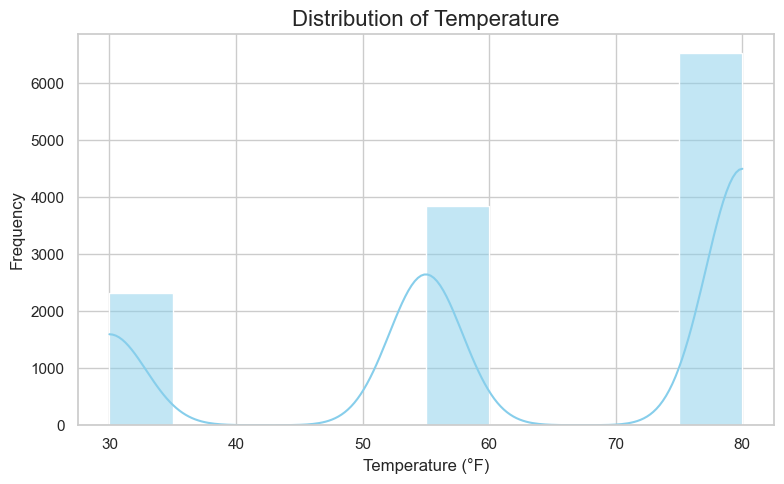

In [74]:
# Set style for consistency
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='temperature', bins=10, kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [75]:
# New DataFrame to include only 'Bar' coupons
bar_coupons = data[data['coupon'] == 'Bar'].copy()

# Display the first few rows to confirm
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [76]:
# Calculate the proportion of accepted 'Bar' coupons
bar_acceptance_rate = bar_coupons['Y'].mean()

# Display the result as a percentage
print(f"Bar Coupon Acceptance Rate: {bar_acceptance_rate:.2%}")

Bar Coupon Acceptance Rate: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [77]:
# Group bar frequency responses into two categories
few_visits = ['never', 'less1', '1~3']
frequent_visits = ['4~8', 'gt8']

# Calculate acceptance rates for each group
few_visits_accept = bar_coupons[bar_coupons['Bar'].isin(few_visits)]['Y'].mean()
frequent_visits_accept = bar_coupons[bar_coupons['Bar'].isin(frequent_visits)]['Y'].mean()

# Display the results
print(f"Acceptance rate for <=3 bar visits/month: {few_visits_accept:.2%}")
print(f"Acceptance rate for >3 bar visits/month: {frequent_visits_accept:.2%}")

Acceptance rate for <=3 bar visits/month: 37.06%
Acceptance rate for >3 bar visits/month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [40]:
# Define categories for bar frequency
more_than_once = ['1~3', '4~8', 'gt8']

# Filter drivers who go to bars more than once/month and are over 25
target_group = bar_coupons[
    (bar_coupons['Bar'].isin(more_than_once)) &
    (~bar_coupons['age'].isin(['below21', '21']))  # exclude ages less than or equal to 21
]

# Define all others (complement group)
other_group = bar_coupons.drop(target_group.index)

# Calculate acceptance rates
target_accept = target_group['Y'].mean()
other_accept = other_group['Y'].mean()

# Display results
print(f"Acceptance rate for bar-goers >25 who go >1/month: {target_accept:.2%}")
print(f"Acceptance rate for all others: {other_accept:.2%}")
print(f"Difference: {(target_accept - other_accept) * 100:.2f} percentage points")

Acceptance rate for bar-goers >25 who go >1/month: 69.52%
Acceptance rate for all others: 33.50%
Difference: 36.02 percentage points


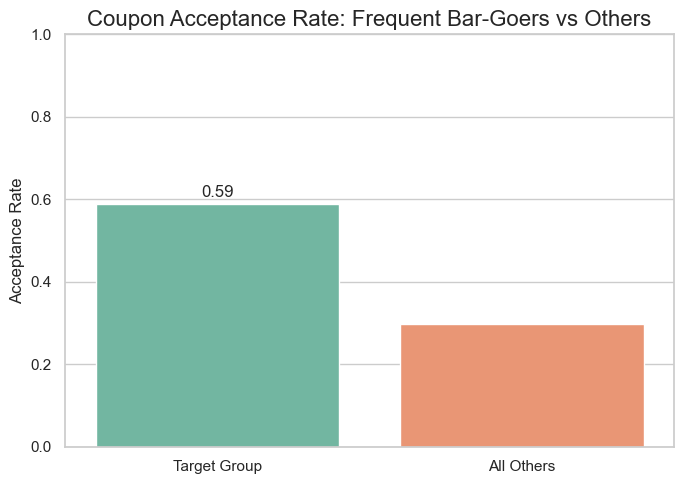

In [48]:
# --- Create visualization ---

# --- Create DataFrame for visualization ---
plot_df = pd.DataFrame({
    'Group': ['Target Group', 'All Others'],
    'Acceptance Rate': [target_accept, other_accept]
})

# --- Plot the results ---
plt.figure(figsize=(7, 5))
sns.barplot(data=plot_df, x='Group', y='Acceptance Rate', palette='Set2', hue='Group', legend=False)

# Add title and labels
plt.title('Coupon Acceptance Rate: Frequent Bar-Goers vs Others', fontsize=16)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xlabel('')
plt.ylim(0, 1)

# Annotate bars with exact percentages
plt.bar_label(plt.gca().containers[0], fmt='%.2f', padding=3)

# Display the chart
plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [41]:
# Define bar frequency for more than once a month
more_than_once = ['1~3', '4~8', 'gt8']

# Define filtering conditions
condition = (
    (bar_coupons['Bar'].isin(more_than_once)) &                   # Goes to bars more than once/month
    (bar_coupons['passanger'] != 'Kid(s)') &                      # Passenger is NOT a kid
    (bar_coupons['occupation'] != 'Farming, Fishing & Forestry')  # Occupation is not in that group
)

# Define target and comparison groups
target_group = bar_coupons[condition]
other_group = bar_coupons[~condition]

# Calculate acceptance rates
target_accept = target_group['Y'].mean()
other_accept = other_group['Y'].mean()

# Display results
print(f"Acceptance rate for target group: {target_accept:.2%}")
print(f"Acceptance rate for all others: {other_accept:.2%}")
print(f"Difference: {(target_accept - other_accept) * 100:.2f} percentage points")

Acceptance rate for target group: 71.32%
Acceptance rate for all others: 29.60%
Difference: 41.72 percentage points


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [42]:
# Define frequency categories
more_than_once = ['1~3', '4~8', 'gt8']
cheap_restaurants_often = ['4~8', 'gt8']

# --- Define each condition ---
# 1️. Goes to bars >1/month, no kids as passengers, not widowed
cond1 = (
    (bar_coupons['Bar'].isin(more_than_once)) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
)

# 2️. Goes to bars >1/month and is under 30
cond2 = (
    (bar_coupons['Bar'].isin(more_than_once)) &
    (bar_coupons['age'].isin(['below21', '21', '26']))
)

# 3️. Goes to cheap restaurants >4/month and income < $50K
cond3 = (
    (bar_coupons['RestaurantLessThan20'].isin(cheap_restaurants_often)) &
    (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

# Combine all three conditions using OR (|)
target_condition = cond1 | cond2 | cond3

# Define target and comparison groups
target_group = bar_coupons[target_condition]
other_group = bar_coupons[~target_condition]

# Calculate acceptance rates
target_accept = target_group['Y'].mean()
other_accept = other_group['Y'].mean()

# Display results
print(f"Acceptance rate for target group: {target_accept:.2%}")
print(f"Acceptance rate for all others: {other_accept:.2%}")
print(f"Difference: {(target_accept - other_accept) * 100:.2f} percentage points")



Acceptance rate for target group: 58.89%
Acceptance rate for all others: 29.81%
Difference: 29.08 percentage points


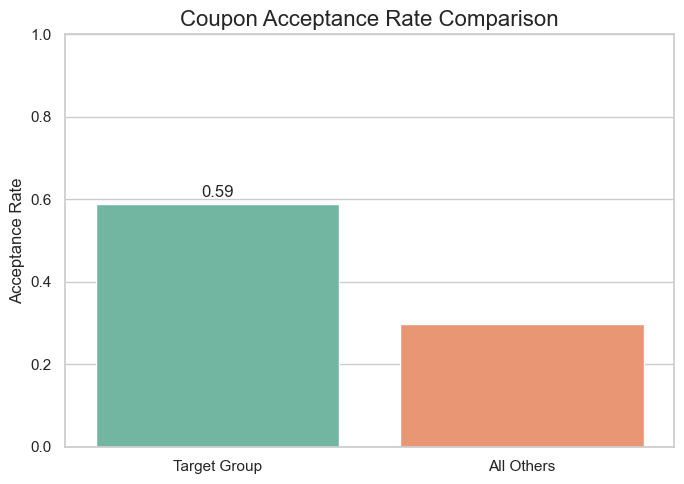

In [46]:
# --- Create visualization ---

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    'Group': ['Target Group', 'All Others'],
    'Acceptance Rate': [target_accept, other_accept]
})

# Create bar plot
plt.figure(figsize=(7, 5))
sns.barplot(data=plot_df, x='Group', y='Acceptance Rate', palette='Set2', hue='Group', legend=False)

# Add titles and labels
plt.title('Coupon Acceptance Rate Comparison', fontsize=16)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xlabel('')
plt.ylim(0, 1)
plt.bar_label(plt.gca().containers[0], fmt='%.2f', padding=3)

# Show plot
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [71]:
"""
· Clearly stated problem for specific coupon group
· Visualizations that demonstrate exploring differences in those who accepted and rejected the coupon
· Interpretation of descriptive and inferential statistics is correct and concise
· The findings are clearly stated in their own section with actionable items highlighted
· Next steps and recommendations
"""

'\n· Clearly stated problem for specific coupon group\n· Visualizations that demonstrate exploring differences in those who accepted and rejected the coupon\n· Interpretation of descriptive and inferential statistics is correct and concise\n· The findings are clearly stated in their own section with actionable items highlighted\n· Next steps and recommendations\n'

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Code References for Methods Used

**Here are reference-documentation URLs (official or canonical) for the methods and operators used in the coupon acceptance dataset:**

